In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'c:\Users\simba\Documents\Simba Learning\Datasets\Smoking UK.csv')

In [2]:
# Initial data inspection
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  gender  age marital_status highest_qualification nationality  \
0           1    Male   38       Divorced      No Qualification     British   
1           2  Female   42         Single      No Qualification     British   
2           3    Male   40        Married                Degree     English   
3           4  Female   40        Married                Degree     English   
4           5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      NaN  
1  Packets  
2      NaN  
3   

In [3]:
# Handle missing values
df = df.dropna(subset=['smoke'])
df['amt_weekends'] = df['amt_weekends'].fillna(0)
df['amt_weekdays'] = df['amt_weekdays'].fillna(0)

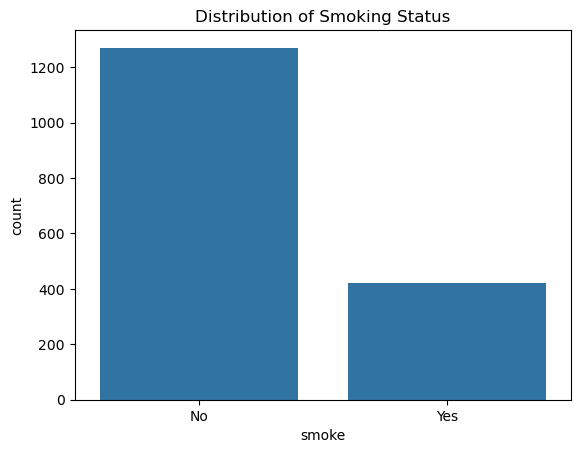

In [4]:
# Univariate Analysis
sns.countplot(x='smoke', data=df)
plt.title('Distribution of Smoking Status')
plt.show()

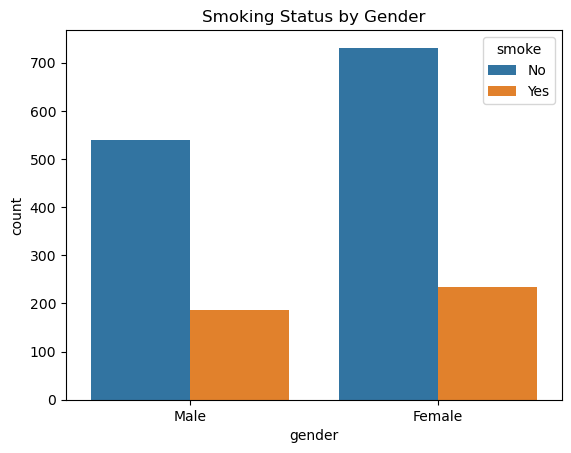

In [5]:
# Bivariate Analysis
sns.countplot(x='gender', hue='smoke', data=df)
plt.title('Smoking Status by Gender')
plt.show()

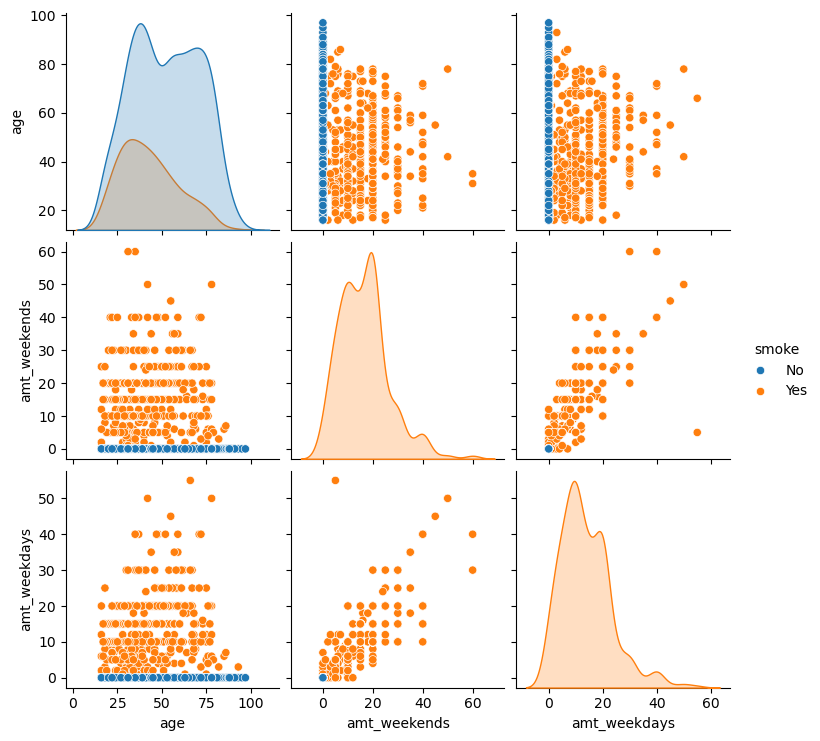

In [6]:
# Multivariate Analysis
sns.pairplot(df[['age', 'gross_income', 'amt_weekends', 'amt_weekdays', 'smoke']], hue='smoke')
plt.show()

In [7]:
# Statistical Analysis
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['smoke'], df['gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 0.4269900285762064, p-value: 0.5134696034678925


In [8]:
from scipy.stats import ttest_ind
smokers = df[df['smoke'] == 'Yes']['amt_weekdays']
non_smokers = df[df['smoke'] == 'No']['amt_weekdays']
t_stat, p_val = ttest_ind(smokers, non_smokers)
print(f"T-Statistic: {t_stat}, p-value: {p_val}")

T-Statistic: 52.22712775786783, p-value: 0.0
